In [1]:
import re
import datetime
import pandas as pd

In [342]:
# Open File

with open("../chats/WhatsApp Chat with Roomates.txt", "r", encoding="utf-8") as file:
    chat = file.read()

print(chat)
print(type(chat))



01/02/24, 6:28 pm - Messages and calls are end-to-end encrypted. Only people in this chat can read, listen to, or share them. Learn more.
01/02/24, 6:28 pm - Devendra Chavada Cse created group "Crest Rooms"
01/02/24, 6:28 pm - Devendra Chavada Cse added you
01/02/24, 6:29 pm - Devendra Chavada Cse: Ankita Ben Makan Malik.vcf (file attached)
01/02/24, 6:29 pm - darshil kanzariya: Shu kidhu
01/02/24, 6:29 pm - darshil kanzariya: Ketli var lag se
01/02/24, 6:29 pm - Devendra Chavada Cse: Call nathi karo ek min re
01/02/24, 6:31 pm - Devendra Chavada Cse: Tya pan na galla valane api 6a
01/02/24, 6:32 pm - Devendra Chavada Cse: Jane be keje santosh bhai na gharni chavi apo etle api dese
01/02/24, 6:33 pm - darshil kanzariya: Bhai gujrati lakh to proper kah
01/02/24, 6:33 pm - You changed the group name from "Crest Rooms" to "Roomates"
01/02/24, 6:33 pm - Devendra Chavada Cse: Dipaa bhai galla vana nu name
01/02/24, 6:33 pm - darshil kanzariya: Nakar English lakh
01/02/24, 6:33 pm - Devendra

In [343]:
print(line)

NameError: name 'line' is not defined

In [344]:
pattern = r'(?P<datetime>\d{1,2}/\d{1,2}/\d{2}, \d{1,2}:\d{2}\s?[ap]m)\s*-\s*(?:(?P<sender>.*?):\s*)?(?P<message>.*)'

matches = re.findall(pattern, chat, re.MULTILINE)
# matches

In [345]:
datetime_str = []
sender = []
message = []

for match in matches:
    datetime_str.append(match[0])
    
    if match[1] == '':
        sender.append('group_notification')
    else:
        sender.append(match[1])
    message.append(match[2])

In [348]:
df = pd.DataFrame({
    'date_time': datetime_str,
    'user': sender,
    'message': message
})

df['date_time'] = pd.to_datetime(df['date_time'], format='%d/%m/%y, %I:%M %p')

In [349]:
df

,date_time,user,message
0,2024-02-01 18:28:00,group_notification,Messages and calls are end-to-end encrypted. O...
1,2024-02-01 18:28:00,group_notification,"Devendra Chavada Cse created group ""Crest Rooms"""
2,2024-02-01 18:28:00,group_notification,Devendra Chavada Cse added you
3,2024-02-01 18:29:00,Devendra Chavada Cse,Ankita Ben Makan Malik.vcf (file attached)
4,2024-02-01 18:29:00,darshil kanzariya,Shu kidhu
...,...,...,...
717,2025-07-13 11:36:00,Harshad Parmar,Etle nathi bolava
718,2025-07-13 12:51:00,darshil kanzariya,Ha
719,2025-07-13 14:18:00,Avadh Sonagra,Haa
720,2025-07-15 08:46:00,Avadh Sonagra,Kachi Sing


In [350]:
df.sort_values(by=['date_time'], inplace=True)

In [351]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 722 entries, 0 to 721
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  722 non-null    datetime64[ns]
 1   user       722 non-null    object        
 2   message    722 non-null    object        
dtypes: datetime64[ns](1), object(2)
memory usage: 22.6+ KB


In [352]:
# df['date_time'] = df['date_time'].dt.strftime('%Y-%m-%d %H:%M:%S')
df

,date_time,user,message
0,2024-02-01 18:28:00,group_notification,Messages and calls are end-to-end encrypted. O...
1,2024-02-01 18:28:00,group_notification,"Devendra Chavada Cse created group ""Crest Rooms"""
2,2024-02-01 18:28:00,group_notification,Devendra Chavada Cse added you
3,2024-02-01 18:29:00,Devendra Chavada Cse,Ankita Ben Makan Malik.vcf (file attached)
4,2024-02-01 18:29:00,darshil kanzariya,Shu kidhu
...,...,...,...
717,2025-07-13 11:36:00,Harshad Parmar,Etle nathi bolava
718,2025-07-13 12:51:00,darshil kanzariya,Ha
719,2025-07-13 14:18:00,Avadh Sonagra,Haa
720,2025-07-15 08:46:00,Avadh Sonagra,Kachi Sing


In [353]:
df['year'] = df['date_time'].dt.year


In [354]:
df['day_name'] = df['date_time'].dt.day_name()

In [355]:
df['month_num'] = df['date_time'].dt.month


In [357]:
df['hour'] = df['date_time'].dt.hour
df['minute'] = df['date_time'].dt.minute

In [358]:
df['month'] = df['date_time'].dt.month_name()

In [359]:
df['day'] = df['date_time'].dt.day

In [360]:
df['date'] = df['date_time'].dt.date

In [361]:
df.drop(columns=['date_time'], axis = 1, inplace=True)

In [362]:
df

,user,message,year,day_name,month_num,hour,month,minute,day,date
0,group_notification,Messages and calls are end-to-end encrypted. O...,2024,Thursday,2,18,February,28,1,2024-02-01
1,group_notification,"Devendra Chavada Cse created group ""Crest Rooms""",2024,Thursday,2,18,February,28,1,2024-02-01
2,group_notification,Devendra Chavada Cse added you,2024,Thursday,2,18,February,28,1,2024-02-01
3,Devendra Chavada Cse,Ankita Ben Makan Malik.vcf (file attached),2024,Thursday,2,18,February,29,1,2024-02-01
4,darshil kanzariya,Shu kidhu,2024,Thursday,2,18,February,29,1,2024-02-01
...,...,...,...,...,...,...,...,...,...,...
717,Harshad Parmar,Etle nathi bolava,2025,Sunday,7,11,July,36,13,2025-07-13
718,darshil kanzariya,Ha,2025,Sunday,7,12,July,51,13,2025-07-13
719,Avadh Sonagra,Haa,2025,Sunday,7,14,July,18,13,2025-07-13
720,Avadh Sonagra,Kachi Sing,2025,Tuesday,7,8,July,46,15,2025-07-15


In [363]:
df['user'].unique()

array(['group_notification', 'Devendra Chavada Cse', 'darshil kanzariya',
       'Avadh Sonagra', 'Harshad Parmar', 'Gautam M'], dtype=object)

In [364]:
df[df['message'] == '<Media omitted>']

,user,message,year,day_name,month_num,hour,month,minute,day,date
33,Gautam M,<Media omitted>,2024,Monday,2,13,February,51,5,2024-02-05
34,Devendra Chavada Cse,<Media omitted>,2024,Monday,2,22,February,2,5,2024-02-05
40,Gautam M,<Media omitted>,2024,Sunday,2,10,February,53,11,2024-02-11
45,Gautam M,<Media omitted>,2024,Sunday,2,21,February,20,11,2024-02-11
48,Avadh Sonagra,<Media omitted>,2024,Sunday,2,21,February,20,11,2024-02-11
...,...,...,...,...,...,...,...,...,...,...
637,Devendra Chavada Cse,<Media omitted>,2025,Sunday,5,13,May,40,18,2025-05-18
640,Devendra Chavada Cse,<Media omitted>,2025,Sunday,5,13,May,40,18,2025-05-18
658,darshil kanzariya,<Media omitted>,2025,Wednesday,5,8,May,54,21,2025-05-21
692,darshil kanzariya,<Media omitted>,2025,Saturday,6,13,June,16,21,2025-06-21


In [365]:
df

,user,message,year,day_name,month_num,hour,month,minute,day,date
0,group_notification,Messages and calls are end-to-end encrypted. O...,2024,Thursday,2,18,February,28,1,2024-02-01
1,group_notification,"Devendra Chavada Cse created group ""Crest Rooms""",2024,Thursday,2,18,February,28,1,2024-02-01
2,group_notification,Devendra Chavada Cse added you,2024,Thursday,2,18,February,28,1,2024-02-01
3,Devendra Chavada Cse,Ankita Ben Makan Malik.vcf (file attached),2024,Thursday,2,18,February,29,1,2024-02-01
4,darshil kanzariya,Shu kidhu,2024,Thursday,2,18,February,29,1,2024-02-01
...,...,...,...,...,...,...,...,...,...,...
717,Harshad Parmar,Etle nathi bolava,2025,Sunday,7,11,July,36,13,2025-07-13
718,darshil kanzariya,Ha,2025,Sunday,7,12,July,51,13,2025-07-13
719,Avadh Sonagra,Haa,2025,Sunday,7,14,July,18,13,2025-07-13
720,Avadh Sonagra,Kachi Sing,2025,Tuesday,7,8,July,46,15,2025-07-15


In [366]:
words = []
    
for message in df['message']:
    words.extend(message.split(' '))
words

['Messages',
 'and',
 'calls',
 'are',
 'end-to-end',
 'encrypted.',
 'Only',
 'people',
 'in',
 'this',
 'chat',
 'can',
 'read,',
 'listen',
 'to,',
 'or',
 'share',
 'them.',
 'Learn',
 'more.',
 'Devendra',
 'Chavada',
 'Cse',
 'created',
 'group',
 '"Crest',
 'Rooms"',
 'Devendra',
 'Chavada',
 'Cse',
 'added',
 'you',
 'Ankita',
 'Ben',
 'Makan',
 'Malik.vcf',
 '(file',
 'attached)',
 'Shu',
 'kidhu',
 'Ketli',
 'var',
 'lag',
 'se',
 'Call',
 'nathi',
 'karo',
 'ek',
 'min',
 're',
 'Tya',
 'pan',
 'na',
 'galla',
 'valane',
 'api',
 '6a',
 'Jane',
 'be',
 'keje',
 'santosh',
 'bhai',
 'na',
 'gharni',
 'chavi',
 'apo',
 'etle',
 'api',
 'dese',
 'Devendra',
 'Chavada',
 'Cse',
 'changed',
 'the',
 'settings',
 'so',
 'only',
 'admins',
 'can',
 'edit',
 'the',
 'group',
 'settings',
 'Devendra',
 'Chavada',
 'Cse',
 'changed',
 'this',
 "group's",
 'settings',
 'to',
 'allow',
 'only',
 'admins',
 'to',
 'add',
 'others',
 'to',
 'this',
 'group.',
 'Nakar',
 'English',
 'lakh'

In [367]:
num_media = df[df['message'] == '<Media omitted>'].shape[0]

In [368]:
num_media

349

In [369]:
df[df['message'].str.contains('<Media omitted>')].shape[0]

349

In [370]:
def fetch_stats(selected_user, df):
    if selected_user != "Overall":
        df = df[df['user'] == selected_user]
    
    # fetch the number of messages
    num_messages = df.shape[0]
    
    # Number of words
    words = []
    
    for message in df['message']:
        words.extend(message.split(' '))
    
    num_words = len(words)
    
    # Number of media items
    num_media = df[df['message'] == '<Media omitted>'].shape[0]

    return num_messages, num_words, num_media

selected_user = "Overall"
num_messages, num_words, num_media = fetch_stats(selected_user, df)
print(f"Number of messages: {num_messages}")
print(f"Number of words: {num_words}")
print(f"Number of media items: {num_media}")

Number of messages: 722
Number of words: 2254
Number of media items: 349


In [371]:
def preprocessor(chat: str):
    pattern = r"(?P<datetime>\d{1,2}/\d{1,2}/\d{2}, \d{1,2}:\d{2}\s?[ap]m)\s*-\s*(?:(?P<sender>.*?):\s*)?(?P<message>.*)"
    matches = re.findall(pattern, chat, re.MULTILINE)

    datetime_str = []
    sender = []
    message = []

    for match in matches:
        datetime_str.append(match[0])

        if match[1] == "":
            sender.append("group_notification")
        else:
            sender.append(match[1])
        message.append(match[2])

    df = pd.DataFrame({"date_time": datetime_str, "user": sender, "message": message})
    # df.sort_values(by=["date_time"], inplace=True)
    df["date_time"] = pd.to_datetime(df["date_time"], format="%d/%m/%y, %I:%M %p")

    # cleaned data
    df['year'] = df['date_time'].dt.year
    df['month'] = df['date_time'].dt.month_name()
    df['day'] = df['date_time'].dt.day
    df['month_num'] = df['date_time'].dt.month
    
    df.drop(columns=['date_time'], axis = 1, inplace=True)
    
    return df

df_dummy = preprocessor(chat)

In [372]:
df_dummy['message'].str.contains('<Media omitted>').sum()

np.int64(349)

In [373]:
from urlextract import URLExtract

links = []
extarctor = URLExtract()

for message in df['message']:
    urls = extarctor.find_urls(message)
    links.extend(urls)

links

['https://goo.gl/maps/o328VbSLaNsPchqc7',
 'https://docs.google.com/forms/d/e/1FAIpQLSfRbS9CEOXzbUgro2JrczykvHZLRaUdmj3VoBTUfCv2EFdKvQ/viewform',
 'https://maps.google.com/?q=23.0281727,72.4772989',
 'https://youtu.be/sYK4moWS_6U?si=qj9iAf8ZNadTM6Yt',
 'https://youtu.be/bgAP26Y5FyQ?si=E70JZMSmjMMZlB6P',
 'https://maps.google.com/?q=23.0596771,72.5318378',
 'https://maps.google.com?q=Karnavati%20Apartment,%20Jodhpur%20Village%20Road,%20Jodhpur%20Village,%20Ahmedabad,%20Gujarat&ftid=0x395e84d215c3d583:0x25b7e1c3244f007a&entry=gps&lucs=,94224825,94227247,94227248,94231188,47071704,47069508,94218641,94203019,47084304,94208458,94208447&g_st=com.google.maps.preview.copy',
 'https://www.olx.in/item/for-rent-houses-apartments-c1723-3-bhk-apartments-0-sq-ft-in-thaltej-ahmedabad-iid-1802400930',
 'https://www.olx.in/openapp',
 'https://maps.app.goo.gl/fYXXqjWx18r35epo8?g_st=ac',
 'https://facebook.com/groups/FlatAndFlatmatesAhmedabad/',
 'https://facebook.com/groups/184929025732148/',
 'https://

In [374]:
# Most busy users

busy_users = df['user'].value_counts().head(5)
busy_users

user
Devendra Chavada Cse    317
darshil kanzariya       183
Avadh Sonagra            77
Gautam M                 68
Harshad Parmar           61
Name: count, dtype: int64

<Axes: xlabel='user'>

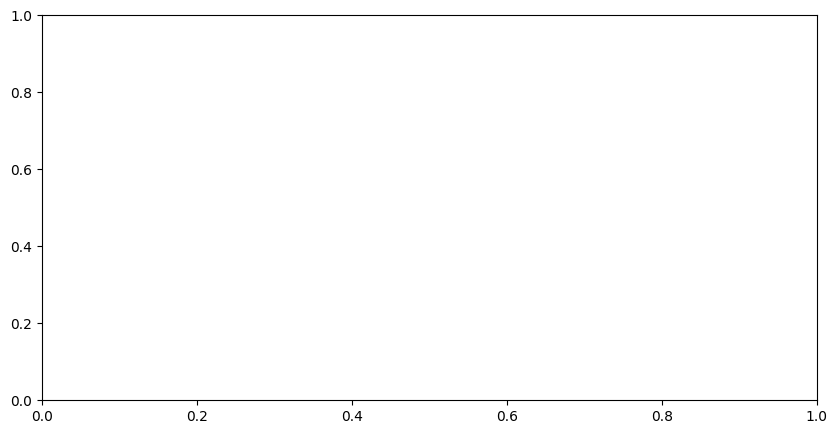

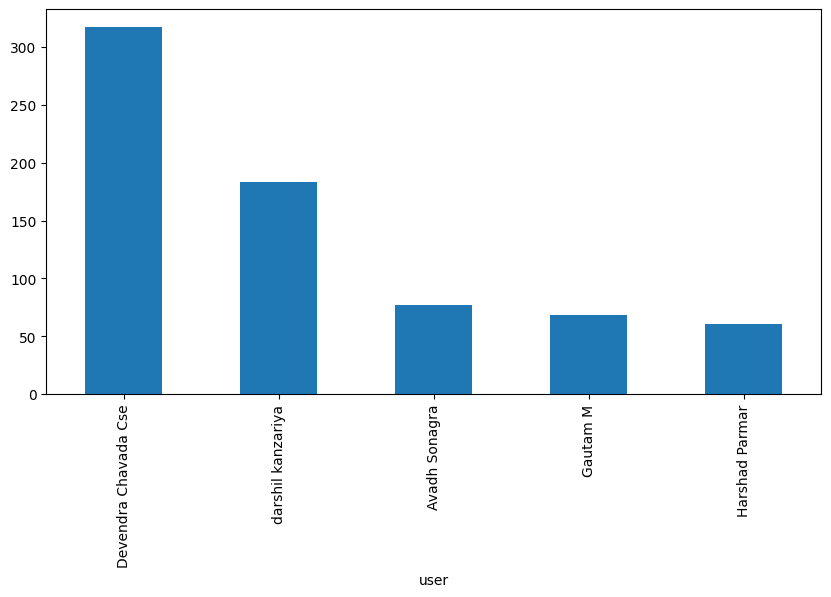

In [375]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(10, 5))
plt.figure(figsize=(10, 5))
busy_users.plot(kind='bar')


In [376]:
round((df['user'].value_counts().head(5) / df.shape[0]) * 100, 2).reset_index(name='percentage')

,user,percentage
0,Devendra Chavada Cse,43.91
1,darshil kanzariya,25.35
2,Avadh Sonagra,10.66
3,Gautam M,9.42
4,Harshad Parmar,8.45


In [377]:
# import stop words
stop_words = open('../stop_hinglish.txt', 'r').read().split('\n')
stop_words

['.',
 '..',
 '...',
 '?',
 '-',
 '--',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '0',
 'a',
 'aadi',
 'aaj',
 'aap',
 'aapne',
 'aata',
 'aati',
 'aaya',
 'aaye',
 'ab',
 'abbe',
 'abbey',
 'abe',
 'abhi',
 'able',
 'about',
 'above',
 'accha',
 'according',
 'accordingly',
 'acha',
 'achcha',
 'across',
 'actually',
 'after',
 'afterwards',
 'again',
 'against',
 'agar',
 'ain',
 'aint',
 "ain't",
 'aisa',
 'aise',
 'aisi',
 'alag',
 'all',
 'allow',
 'allows',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'an',
 'and',
 'andar',
 'another',
 'any',
 'anybody',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anyways',
 'anywhere',
 'ap',
 'apan',
 'apart',
 'apna',
 'apnaa',
 'apne',
 'apni',
 'appear',
 'are',
 'aren',
 'arent',
 "aren't",
 'around',
 'arre',
 'as',
 'aside',
 'ask',
 'asking',
 'at',
 'aur',
 'avum',
 'aya',
 'aye',
 'baad',
 'baar',
 'bad',
 'bahut',
 'bana',
 'banae',
 'banai',
 'banao',
 'b

In [378]:
# Top words used in chatting

# Remove the ommitted media
# Remove group_notifications message
# Rmove StopWords

from collections import Counter
words = []

# Remove group Notifications

new_df = df[df['user'] != 'group_notification']
new_df = new_df[new_df['message'] != '<Media omitted>']

for message in new_df['message']:
    for w in message.lower().split(' '):
        if w not in stop_words:
            words.append(w)

count = Counter(words)
pd.DataFrame(count.most_common(20))

,0,1
0,message,18
1,che,16
2,(file,12
3,attached),12
4,@917283819316,11
5,flat,11
6,@919016488128,10
7,deleted,10
8,chhe,10
9,rent,10


In [379]:
df[df['message'] == 'message Deleted']

,user,message,year,day_name,month_num,hour,month,minute,day,date


In [380]:
import emoji
emojis = []

for message in df['message']:
    emojis.extend(emoji.distinct_emoji_list(message))
emojis

count_emojis = Counter(emojis)
emoji_df = pd.DataFrame(count_emojis.most_common(20))
emoji_df

,0,1
0,😂,9
1,🥳,3
2,🙏,2
3,😅,1
4,🙂,1
5,🛑,1
6,🥵,1
7,🤡,1
8,🥹,1
9,🍕,1


In [381]:
timeline = df.groupby(['year', 'month_num', 'month']).count()['message'].reset_index()

In [382]:
timeline

,year,month_num,month,message
0,2024,2,February,99
1,2024,3,March,12
2,2024,4,April,8
3,2024,5,May,2
4,2024,6,June,17
5,2024,7,July,16
6,2024,8,August,21
7,2024,9,September,7
8,2024,10,October,9
9,2024,11,November,6


In [383]:
time = []
for i in range(timeline.shape[0]):
    time.append(f"{timeline['month'][i]}-{timeline['year'][i]}")

In [384]:
timeline['time'] = time

In [385]:
timeline

,year,month_num,month,message,time
0,2024,2,February,99,February-2024
1,2024,3,March,12,March-2024
2,2024,4,April,8,April-2024
3,2024,5,May,2,May-2024
4,2024,6,June,17,June-2024
5,2024,7,July,16,July-2024
6,2024,8,August,21,August-2024
7,2024,9,September,7,September-2024
8,2024,10,October,9,October-2024
9,2024,11,November,6,November-2024


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'February-2024'),
  Text(1, 0, 'March-2024'),
  Text(2, 0, 'April-2024'),
  Text(3, 0, 'May-2024'),
  Text(4, 0, 'June-2024'),
  Text(5, 0, 'July-2024'),
  Text(6, 0, 'August-2024'),
  Text(7, 0, 'September-2024'),
  Text(8, 0, 'October-2024'),
  Text(9, 0, 'November-2024'),
  Text(10, 0, 'December-2024'),
  Text(11, 0, 'January-2025'),
  Text(12, 0, 'February-2025'),
  Text(13, 0, 'March-2025'),
  Text(14, 0, 'April-2025'),
  Text(15, 0, 'May-2025'),
  Text(16, 0, 'June-2025'),
  Text(17, 0, 'July-2025')])

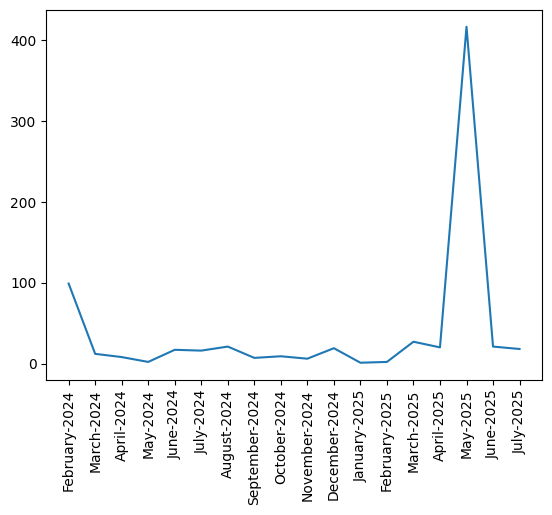

In [386]:
plt.plot(timeline['time'], timeline['message'])
plt.xticks(rotation='vertical')

In [387]:
daily_timeline = df.groupby('date').count()['message'].reset_index()
daily_timeline

,date,message
0,2024-02-01,21
1,2024-02-02,4
2,2024-02-03,1
3,2024-02-05,9
4,2024-02-09,4
...,...,...
107,2025-07-09,1
108,2025-07-10,1
109,2025-07-11,1
110,2025-07-13,9


In [388]:
df['day_name'].value_counts()

day_name
Sunday       165
Friday       119
Tuesday      101
Wednesday    101
Monday        96
Thursday      81
Saturday      59
Name: count, dtype: int64

In [389]:
df

,user,message,year,day_name,month_num,hour,month,minute,day,date
0,group_notification,Messages and calls are end-to-end encrypted. O...,2024,Thursday,2,18,February,28,1,2024-02-01
1,group_notification,"Devendra Chavada Cse created group ""Crest Rooms""",2024,Thursday,2,18,February,28,1,2024-02-01
2,group_notification,Devendra Chavada Cse added you,2024,Thursday,2,18,February,28,1,2024-02-01
3,Devendra Chavada Cse,Ankita Ben Makan Malik.vcf (file attached),2024,Thursday,2,18,February,29,1,2024-02-01
4,darshil kanzariya,Shu kidhu,2024,Thursday,2,18,February,29,1,2024-02-01
...,...,...,...,...,...,...,...,...,...,...
717,Harshad Parmar,Etle nathi bolava,2025,Sunday,7,11,July,36,13,2025-07-13
718,darshil kanzariya,Ha,2025,Sunday,7,12,July,51,13,2025-07-13
719,Avadh Sonagra,Haa,2025,Sunday,7,14,July,18,13,2025-07-13
720,Avadh Sonagra,Kachi Sing,2025,Tuesday,7,8,July,46,15,2025-07-15


In [391]:
df[['day_name', 'hour']]

,day_name,hour
0,Thursday,18
1,Thursday,18
2,Thursday,18
3,Thursday,18
4,Thursday,18
...,...,...
717,Sunday,11
718,Sunday,12
719,Sunday,14
720,Tuesday,8


In [392]:
period = []

for hour in df['hour']:
    if hour == 23:
        period.append(f'{hour}-00')
    elif hour == 0:
        period.append(f'00-{hour+1}')
    else:
        period.append(f'{hour}-{hour+1}')

In [393]:
df['period'] = period

In [394]:
df

,user,message,year,day_name,month_num,hour,month,minute,day,date,period
0,group_notification,Messages and calls are end-to-end encrypted. O...,2024,Thursday,2,18,February,28,1,2024-02-01,18-19
1,group_notification,"Devendra Chavada Cse created group ""Crest Rooms""",2024,Thursday,2,18,February,28,1,2024-02-01,18-19
2,group_notification,Devendra Chavada Cse added you,2024,Thursday,2,18,February,28,1,2024-02-01,18-19
3,Devendra Chavada Cse,Ankita Ben Makan Malik.vcf (file attached),2024,Thursday,2,18,February,29,1,2024-02-01,18-19
4,darshil kanzariya,Shu kidhu,2024,Thursday,2,18,February,29,1,2024-02-01,18-19
...,...,...,...,...,...,...,...,...,...,...,...
717,Harshad Parmar,Etle nathi bolava,2025,Sunday,7,11,July,36,13,2025-07-13,11-12
718,darshil kanzariya,Ha,2025,Sunday,7,12,July,51,13,2025-07-13,12-13
719,Avadh Sonagra,Haa,2025,Sunday,7,14,July,18,13,2025-07-13,14-15
720,Avadh Sonagra,Kachi Sing,2025,Tuesday,7,8,July,46,15,2025-07-15,8-9


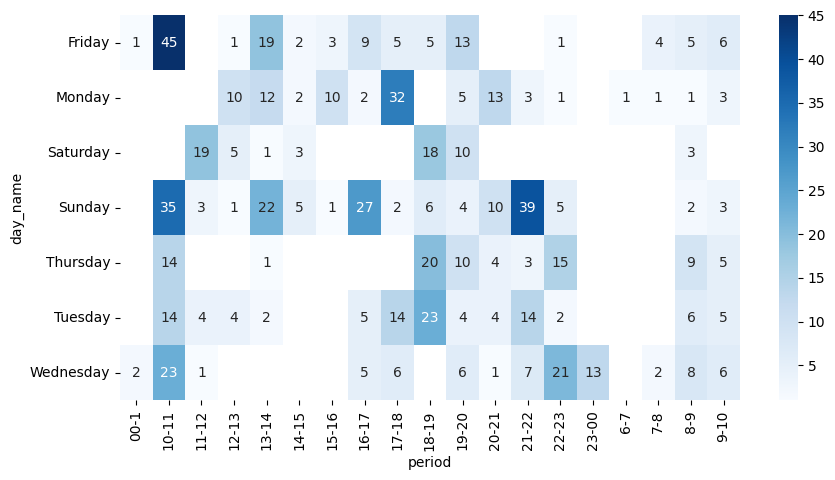

In [398]:
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.heatmap(df.pivot_table(index='day_name', columns='period', values='message', aggfunc='count'), annot=True, cmap='Blues')
plt.yticks(rotation='horizontal')
plt.show()
